## MZTree things

MZTree is a little annoying since it's only supplied as a GUI and I can't figure out how to pass a file to it to open/convert and how to specify the IP address for the server, though that second one is probably more on me working in and out of WSL.

However, once the server is open and available then it can still be queried, albeit without the ability to index at a specific scan. It also is supposed to do some clever determination of which peaks to return instead of returning all the peaks in the bounding box, so we have to set the number of points to return to something super large to get the raw data.

Get the ethernet IP address using `ifconfig` then start the server using the below command and manually load in the MzTree file (example in demo_data) and hit the "Start" button, leaving port as 4567.

`java -jar MZTree/msDataServer/msDataServer-1.0.jar`

File 

`mzsql/demo_data/11-19-2024_11-27-00.mzTree`

In [2]:
import requests
from requests.exceptions import ConnectionError
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)  # (width, height) in inches
from mzsql import *

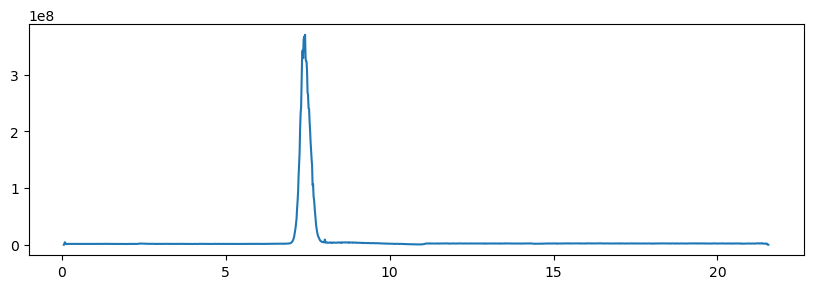

In [3]:
chrom_data = get_chrom_mztree("http://172.27.178.175:4568", 118.0865, 10)
plt.plot(chrom_data["rt"], chrom_data["int"])

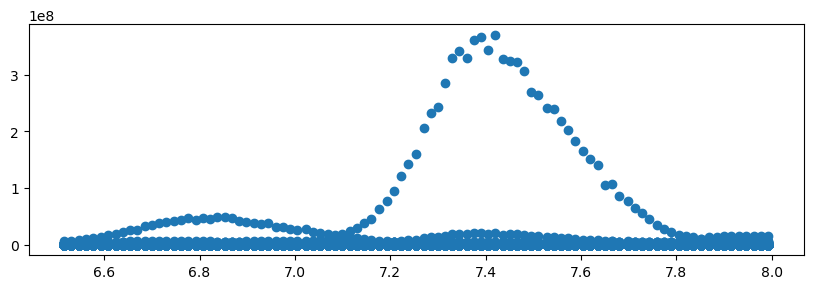

In [3]:
rtrange_data = get_rtrange_mztree("http://172.27.178.175:4567", 6.5, 8)
plt.scatter(rtrange_data["rt"], rtrange_data["int"])

In [5]:
import timeit
mztree_chrom = timeit.repeat('get_chrom_mztree("http://172.27.178.175:4567", 118.0865, 10)', globals=globals(), number=1, repeat=10)
mztree_rtrange = timeit.repeat('get_rtrange_mztree("http://172.27.178.175:4567", 6.5, 8)', globals=globals(), number=1, repeat=10)

In [7]:
import pandas as pd
rtrange_df = pd.DataFrame({
    "method": ["mztree"]*10,
    "time": mztree_rtrange
})
rtrange_df["metric"] = "rtrange"
chrom_df = pd.DataFrame({
    "method": ["mztree"]*10,
    "time": mztree_chrom
})
chrom_df["metric"] = "chrom"

complete_timings = pd.concat([chrom_df, rtrange_df], ignore_index=True)
complete_timings["datetime"] = pd.to_datetime('now')
complete_timings.to_csv("compiled_timings.csv", mode='a', index=False, header=False)